## Obtaining, cleaning and preparing data

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
%matplotlib notebook

In [2]:
#datetime data range

from_date = datetime.date(1900,1,1)
to_date = datetime.date(2021,11,1)

In [3]:
#obtaining data from Federal Reserve Economic Data | FRED | St. Louis Fed

fred_data = web.DataReader(['FEDFUNDS','GS10','M2NS','PERMIT','UMCSENT','TCU','UMTMNO',
                            'PAYNSA','UNRATE','RSXFSN','CPILFENS'],
                               data_source='fred',start=from_date, end=to_date)
fred_data.dropna(inplace=True)

In [4]:
fred_data.head()

,FEDFUNDS,GS10,M2NS,PERMIT,UMCSENT,TCU,UMTMNO,PAYNSA,UNRATE,RSXFSN,CPILFENS
DATE,,,,,,,,,,,
1992-02-01,4.06,7.34,3390.1,1146.0,68.8,79.8145,228230.0,106977,7.4,131244.0,145.6
1992-03-01,3.98,7.54,3404.8,1082.0,76.0,80.3033,245052.0,107495,7.4,142488.0,146.4
1992-04-01,3.73,7.48,3418.9,1054.0,77.2,80.7450,236726.0,108330,7.4,147175.0,146.6
1992-05-01,3.82,7.39,3388.0,1056.0,79.2,80.8311,238178.0,109137,7.6,152420.0,146.7
1992-06-01,3.76,7.26,3388.7,1057.0,80.4,80.6997,254919.0,109626,7.8,151849.0,146.9


In [5]:
# changing working directory

import os

cwd = os.getcwd()
os.chdir('D:/Data Science Projects/US_Core_Inflation_Forecast')
print("Current working directory: {0}".format(cwd))

# obtaining data from csv file (Institute for Supply and Management PMI)

ism_man_data = pd.read_csv('ISM Manufacturing.csv')
ism_serv_data = pd.read_csv('ISM Services.csv')

Current working directory: D:\Data Science Projects\US_Core_Inflation_Forecast\IPYNB Files


In [6]:
print(ism_man_data.head())
print(ism_serv_data.head())

         Release Date Observation Date  PMI M Composite  PMI M Prices
0  Jan 01, 1970 (Dec)           Dec-69             52.0          82.2
1  Feb 01, 1970 (Jan)           Jan-70             48.7          80.6
2  Mar 01, 1970 (Feb)           Feb-70             47.4          74.5
3  Apr 01, 1970 (Mar)           Mar-70             46.9          67.8
4  May 01, 1970 (Apr)           Apr-70             45.0          75.1
         Release Date Observation Date  PMI S Composite  PMI S Prices
0  Aug 01, 1997 (Jul)           Jul-97             56.7          50.9
1  Sep 01, 1997 (Aug)           Aug-97             62.0          53.3
2  Oct 01, 1997 (Sep)           Sep-97             56.2          53.1
3  Nov 01, 1997 (Oct)           Oct-97             56.6          53.1
4  Dec 01, 1997 (Nov)           Nov-97             58.5          54.3


In [7]:
# cleaning, sorting and merging databases

    #ISM databases
ism_data = pd.merge(left=ism_serv_data, right=ism_man_data, how='inner', on='Observation Date')
ism_data.drop(columns=['Release Date_x','Release Date_y'],inplace=True)
ism_data['Observation Date'] = pd.to_datetime(arg=ism_data['Observation Date'], format='%b-%y', infer_datetime_format=True)
ism_data.set_index('Observation Date', inplace=True)

    #FRED databases
fred_data.columns = ['FED Funds Rate','10 Year Treasury Rate','M2','Building Permits',
                    'Consumer Sentiment','Capacity Utilization','Manufacturing New Orders',
                     'Nonfarm Employment','Unemployment Rate SA','Retail Trade','CPI Core NSA']

In [8]:
# checking data types

print(fred_data.dtypes)
print(ism_data.dtypes)

FED Funds Rate              float64
10 Year Treasury Rate       float64
M2                          float64
Building Permits            float64
Consumer Sentiment          float64
Capacity Utilization        float64
Manufacturing New Orders    float64
Nonfarm Employment            int64
Unemployment Rate SA        float64
Retail Trade                float64
CPI Core NSA                float64
dtype: object
PMI S Composite    float64
PMI S Prices       float64
PMI M Composite    float64
PMI M Prices       float64
dtype: object


In [9]:
# merging ism and fred data

data_all = pd.merge(ism_data,fred_data,how='inner',left_index=True, right_index=True)
data_all.tail()

,PMI S Composite,PMI S Prices,PMI M Composite,PMI M Prices,FED Funds Rate,10 Year Treasury Rate,M2,Building Permits,Consumer Sentiment,Capacity Utilization,Manufacturing New Orders,Nonfarm Employment,Unemployment Rate SA,Retail Trade,CPI Core NSA
2021-07-01,64.1,82.3,59.5,85.7,0.10,1.32,20609.1,1630.0,81.2,76.2126,492093.0,146536,5.4,558031.0,279.146
2021-08-01,61.7,75.4,59.9,79.4,0.09,1.28,20810.7,1721.0,70.3,76.0702,525042.0,147012,5.2,557018.0,279.507
2021-09-01,61.9,77.5,61.1,81.2,0.08,1.37,20995.6,1586.0,72.8,75.2589,529459.0,147650,4.7,536229.0,279.884
2021-10-01,66.7,82.9,60.8,85.7,0.08,1.58,21178.6,1653.0,71.7,76.4801,524174.0,149245,4.6,559301.0,281.617
2021-11-01,69.1,82.3,61.1,82.4,0.08,1.56,21425.9,1717.0,67.4,76.8314,517146.0,150098,4.2,579368.0,282.754


In [10]:
# data manipulation

data_all['Released Date'] = data_all.index + pd.DateOffset(months=1) # release date for economic indicators (1 month lag)
data_all['PMI Composite Avg'] = np.average(data_all[['PMI S Composite','PMI M Composite']],axis=1) # PMI Composite Average
data_all['PMI Prices Avg'] = np.average(data_all[['PMI S Prices','PMI M Prices']],axis=1) # PMI Prices Average
                                
data_all = data_all[['Released Date',
                     'PMI M Composite','PMI S Composite','PMI Composite Avg',
                     'PMI M Prices','PMI S Prices','PMI Prices Avg',
                     'Building Permits','Consumer Sentiment',
                     'FED Funds Rate','10 Year Treasury Rate','M2',
                     'Capacity Utilization','Manufacturing New Orders',
                     'Nonfarm Employment','Unemployment Rate SA',
                     'Retail Trade',
                     'CPI Core NSA']]

# percentage change calculation

data_calc = data_all.copy(deep=True)
data_calc['Building Permits YoY'] = data_calc['Building Permits'].pct_change(periods=12) * 100
data_calc['Consumer Sentiment YoY'] = data_calc['Consumer Sentiment'].pct_change(periods=12) * 100
data_calc['M2 YoY'] = data_calc['M2'].pct_change(periods=12) * 100
data_calc['Capacity Utilization YoY'] = data_calc['Capacity Utilization'].pct_change(periods=12)
data_calc['Manufacturing New Orders YoY'] = data_calc['Manufacturing New Orders'].pct_change(periods=12) * 100
data_calc['Nonfarm Employment YoY'] = data_calc['Nonfarm Employment'].pct_change(periods=12) * 100
data_calc['Unemployment Rate SA Adj'] = data_calc['Unemployment Rate SA'] * (-1)
data_calc['Retail Trade YoY'] = data_calc['Retail Trade'].pct_change(periods=12) * 100
data_calc['CPI Core NSA YoY'] = data_calc['CPI Core NSA'].pct_change(periods=12) * 100

In [11]:
data_calc.head(15)

,Released Date,PMI M Composite,PMI S Composite,PMI Composite Avg,PMI M Prices,PMI S Prices,PMI Prices Avg,Building Permits,Consumer Sentiment,FED Funds Rate,...,CPI Core NSA,Building Permits YoY,Consumer Sentiment YoY,M2 YoY,Capacity Utilization YoY,Manufacturing New Orders YoY,Nonfarm Employment YoY,Unemployment Rate SA Adj,Retail Trade YoY,CPI Core NSA YoY
1997-07-01,1997-08-01,57.7,56.7,57.20,52.0,50.9,51.45,1440.0,107.1,5.52,...,169.5,NaN,NaN,NaN,NaN,NaN,NaN,-4.9,NaN,NaN
1997-08-01,1997-09-01,56.3,62.0,59.15,52.1,53.3,52.70,1449.0,104.4,5.54,...,169.6,NaN,NaN,NaN,NaN,NaN,NaN,-4.8,NaN,NaN
1997-09-01,1997-10-01,53.9,56.2,55.05,53.0,53.1,53.05,1494.0,106.0,5.54,...,170.0,NaN,NaN,NaN,NaN,NaN,NaN,-4.9,NaN,NaN
1997-10-01,1997-11-01,56.4,56.6,56.50,53.6,53.1,53.35,1499.0,105.6,5.50,...,170.8,NaN,NaN,NaN,NaN,NaN,NaN,-4.7,NaN,NaN
1997-11-01,1997-12-01,55.7,58.5,57.10,52.1,54.3,53.20,1469.0,107.2,5.52,...,170.8,NaN,NaN,NaN,NaN,NaN,NaN,-4.6,NaN,NaN
1997-12-01,1998-01-01,54.5,55.5,55.00,52.2,54.9,53.55,1456.0,102.1,5.50,...,170.7,NaN,NaN,NaN,NaN,NaN,NaN,-4.7,NaN,NaN
1998-01-01,1998-02-01,53.8,57.0,55.40,47.0,52.7,49.85,1555.0,106.6,5.56,...,171.2,NaN,NaN,NaN,NaN,NaN,NaN,-4.6,NaN,NaN
1998-02-01,1998-03-01,52.9,56.2,54.55,45.5,51.6,48.55,1647.0,110.4,5.51,...,172.1,NaN,NaN,NaN,NaN,NaN,NaN,-4.6,NaN,NaN
1998-03-01,1998-04-01,52.9,54.7,53.80,44.2,47.9,46.05,1605.0,106.5,5.49,...,172.6,NaN,NaN,NaN,NaN,NaN,NaN,-4.7,NaN,NaN
1998-04-01,1998-05-01,52.2,54.9,53.55,40.5,46.8,43.65,1547.0,108.7,5.45,...,173.0,NaN,NaN,NaN,NaN,NaN,NaN,-4.3,NaN,NaN


In [12]:
# time shifting and correlation sweet spot

data_shift_pc = data_calc[12:270] # selecting pre Covid-19 crisis data only
data_shift_ci = data_calc[12:] # selecting all available data (Covid-19 crisis included)

def data_corr_test(data_shift):

    data_shift = data_shift[['PMI M Composite','PMI S Composite','PMI Composite Avg',
                             'PMI M Prices','PMI S Prices','PMI Prices Avg',
                             'Building Permits','Consumer Sentiment',
                             'FED Funds Rate','10 Year Treasury Rate',
                             'Capacity Utilization','Unemployment Rate SA Adj',
                             'Building Permits YoY','Consumer Sentiment YoY','M2 YoY',
                             'Capacity Utilization YoY','Manufacturing New Orders YoY',
                             'Nonfarm Employment YoY','Retail Trade YoY',
                            'CPI Core NSA YoY']]

    time_shift = list(range(0,37))
    columns_x = data_shift.columns[0:19]
    column_y = data_shift.columns[19]
    corr_results = {} # key:columns, values:corr

    #shifting
    for x in columns_x:
        d = data_shift[[x,column_y]]
        corr_results.setdefault(x,[])
        for t in time_shift:
            pearson = d[x].shift(t).corr(d[column_y],method='pearson')
            corr_results[x].append(pearson)

    #summarizing results
    time_shift = {}
    max_corr = {}
    for c in columns_x:
        time_shift[c] = corr_results[c].index(max(corr_results[c]))
        max_corr[c] = max(corr_results[c])
        
    results = [time_shift, max_corr]
    return results

In [13]:
# comparing correlation intensity prior to crisis and after the crisis

data_comparison1 = pd.DataFrame(data=data_corr_test(data_shift_pc)[1],index=[0])
data_comparison1 = data_comparison1.transpose()
data_comparison1.columns = ['Pre Crisis Correlation']

data_comparison2 = pd.DataFrame(data=data_corr_test(data_shift_ci)[1],index=[0])
data_comparison2 = data_comparison2.transpose()
data_comparison2.columns = ['With Crisis Correlation']

data_comparison = pd.concat([data_comparison1,data_comparison2],axis=1)
data_comparison['Correlation Difference'] = data_comparison['Pre Crisis Correlation']-data_comparison['With Crisis Correlation']
data_comparison = data_comparison.round(2)
data_comparison.sort_values(by='Correlation Difference')

,Pre Crisis Correlation,With Crisis Correlation,Correlation Difference
M2 YoY,0.34,0.47,-0.13
PMI S Prices,0.33,0.31,0.02
Building Permits YoY,0.38,0.33,0.05
PMI Prices Avg,0.31,0.25,0.06
PMI M Prices,0.30,0.20,0.10
Building Permits,0.52,0.42,0.10
Consumer Sentiment YoY,0.41,0.28,0.13
Consumer Sentiment,0.65,0.52,0.14
Unemployment Rate SA Adj,0.65,0.51,0.15
Retail Trade YoY,0.68,0.49,0.19


In [14]:
#selection of variables for further evaluation

_ = pd.DataFrame(data_corr_test(data_shift_pc)).transpose().round(2).sort_values(by=1,ascending=False)
_.columns = ['Time shift (Months)','Correlation']
_.drop(index=['PMI Composite Avg','Unemployment Rate SA Adj','PMI M Composite','Capacity Utilization YoY',
             'Consumer Sentiment YoY','10 Year Treasury Rate','Building Permits YoY','M2 YoY',
             'PMI Prices Avg','PMI M Prices'])

,Time shift (Months),Correlation
Capacity Utilization,15.0,0.76
Nonfarm Employment YoY,15.0,0.74
PMI S Composite,18.0,0.70
Retail Trade YoY,18.0,0.68
Consumer Sentiment,21.0,0.65
FED Funds Rate,8.0,0.64
Manufacturing New Orders YoY,17.0,0.53
Building Permits,18.0,0.52
PMI S Prices,17.0,0.33


----------------------------------------------------------------------------------------------------------------------------
#### Short Summary of the results above

Money Supply (M2) is the only indicator that shows better correlation with data including Covid reccession than data until Covid pandemic (end of 2019.). Huge injections by the FED during the lockdown could explain this phenomenon, meaning that big increase in money supply could be one of the main reasons for the jump in core inflation (excluding food and energy) during the last few months.

Purchasing Managers Index Prices component shows negligible difference in two observed data, including Building Permits.

All other indicators show small to medium difference in two observed data, some of the most notable being manufacturing and interest rate indicators, where difference ranges from 0.25 to 0.35.

Economic slowdown caused by the coronavirus pandemic was very volatile. Due to this event, majority of economic indicators show drop in performance for predicting core inflation. To avoid this volatile effect, next observations and modelling will be performed on the data NOT containing period of coronavirus pandemic (2020. and onwards).

----------------------------------------------------------------------------------------------------------------------------

In [16]:
# data adjusting

time_shift = data_corr_test(data_shift_pc)[0]
col_adj = {'PMI S Composite':time_shift['PMI S Composite'],'PMI S Prices':time_shift['PMI S Prices'],
           'Building Permits':time_shift['Building Permits'],'Consumer Sentiment':time_shift['Consumer Sentiment'],
           'FED Funds Rate':time_shift['FED Funds Rate'],'Capacity Utilization':time_shift['Capacity Utilization'],
           'Manufacturing New Orders YoY':time_shift['Manufacturing New Orders YoY'],
           'Nonfarm Employment YoY':time_shift['Nonfarm Employment YoY'],
           'Retail Trade YoY':time_shift['Retail Trade YoY'],'CPI Core NSA YoY':0}
data_adj = data_shift_pc.copy(deep=True)
data_adj = data_adj[col_adj.keys()]

#reseting index for concat
data_adj['Covering Date'] = data_adj.index
data_adj.reset_index(drop=True, inplace=True)

#creating new table for 2 year forward empty datetime space
new_rows = {'Covering Date':pd.date_range(start='2020-01-01',end='2022-01-01',freq='MS'),
            'PMI S Composite':np.nan,'PMI S Prices':np.nan,
            'Building Permits':np.nan,'Consumer Sentiment':np.nan,
           'FED Funds Rate':np.nan,'Capacity Utilization':np.nan,
           'Manufacturing New Orders YoY':np.nan,'Nonfarm Employment YoY':np.nan,'Retail Trade YoY':np.nan,
           'CPI Core NSA YoY':np.nan}
new_df = pd.DataFrame(new_rows)

#concating tables together
data_final = pd.concat([data_adj,new_df],ignore_index=True)
data_final['Covering Date'] = data_final['Covering Date'].dt.strftime('%m-%Y')

#shifting values
data_final['PMI S Composite'] = data_final['PMI S Composite'].shift(col_adj['PMI S Composite'])
data_final['PMI S Prices'] = data_final['PMI S Prices'].shift(col_adj['PMI S Prices'])
data_final['Building Permits'] = data_final['Building Permits'].shift(col_adj['Building Permits'])
data_final['Consumer Sentiment'] = data_final['Consumer Sentiment'].shift(col_adj['Consumer Sentiment'])
data_final['FED Funds Rate'] = data_final['FED Funds Rate'].shift(col_adj['FED Funds Rate'])
data_final['Capacity Utilization'] = data_final['Capacity Utilization'].shift(col_adj['Capacity Utilization'])
data_final['Manufacturing New Orders YoY'] = data_final['Manufacturing New Orders YoY'].shift(col_adj['Manufacturing New Orders YoY'])
data_final['Nonfarm Employment YoY'] = data_final['Nonfarm Employment YoY'].shift(col_adj['Nonfarm Employment YoY'])
data_final['Retail Trade YoY'] = data_final['Retail Trade YoY'].shift(col_adj['Retail Trade YoY'])

#round on 2 decimal places and change columns order
data_final[['Capacity Utilization','Manufacturing New Orders YoY','Nonfarm Employment YoY',
            'Retail Trade YoY','CPI Core NSA YoY']] = data_final[['Capacity Utilization','Manufacturing New Orders YoY',
                                                    'Nonfarm Employment YoY','Retail Trade YoY','CPI Core NSA YoY']].round(2)
data_final = data_final[['Covering Date','PMI S Composite','PMI S Prices',
                         'Building Permits','Consumer Sentiment','FED Funds Rate','Manufacturing New Orders YoY',
                         'Capacity Utilization','Nonfarm Employment YoY','Retail Trade YoY',
                         'CPI Core NSA YoY']]

data_final.tail(26)

,Covering Date,PMI S Composite,PMI S Prices,Building Permits,Consumer Sentiment,FED Funds Rate,Manufacturing New Orders YoY,Capacity Utilization,Nonfarm Employment YoY,Retail Trade YoY,CPI Core NSA YoY
257,12-2019,59.1,63.4,1320.0,101.4,2.42,9.57,79.76,1.62,4.86,2.26
258,01-2020,55.7,62.8,1328.0,98.8,2.39,9.47,79.54,1.60,5.96,NaN
259,02-2020,58.5,64.2,1264.0,98.0,2.38,4.20,79.37,1.53,5.61,NaN
260,03-2020,61.6,61.7,1289.0,98.2,2.40,6.20,79.21,1.56,1.11,NaN
261,04-2020,60.3,64.3,1275.0,97.9,2.13,0.49,78.66,1.70,5.76,NaN
262,05-2020,60.7,57.6,1318.0,96.2,2.04,-0.53,78.11,1.39,3.90,NaN
263,06-2020,57.6,59.4,1338.0,100.1,1.83,6.01,78.09,1.36,-0.70,NaN
264,07-2020,56.7,54.4,1295.0,98.6,1.55,1.74,77.52,1.41,2.48,NaN
265,08-2020,59.7,58.7,1304.0,97.5,1.55,1.08,77.57,1.23,1.13,NaN
266,09-2020,56.1,55.7,1316.0,98.3,NaN,2.16,77.42,1.19,0.49,NaN


<IPython.core.display.Javascript object>


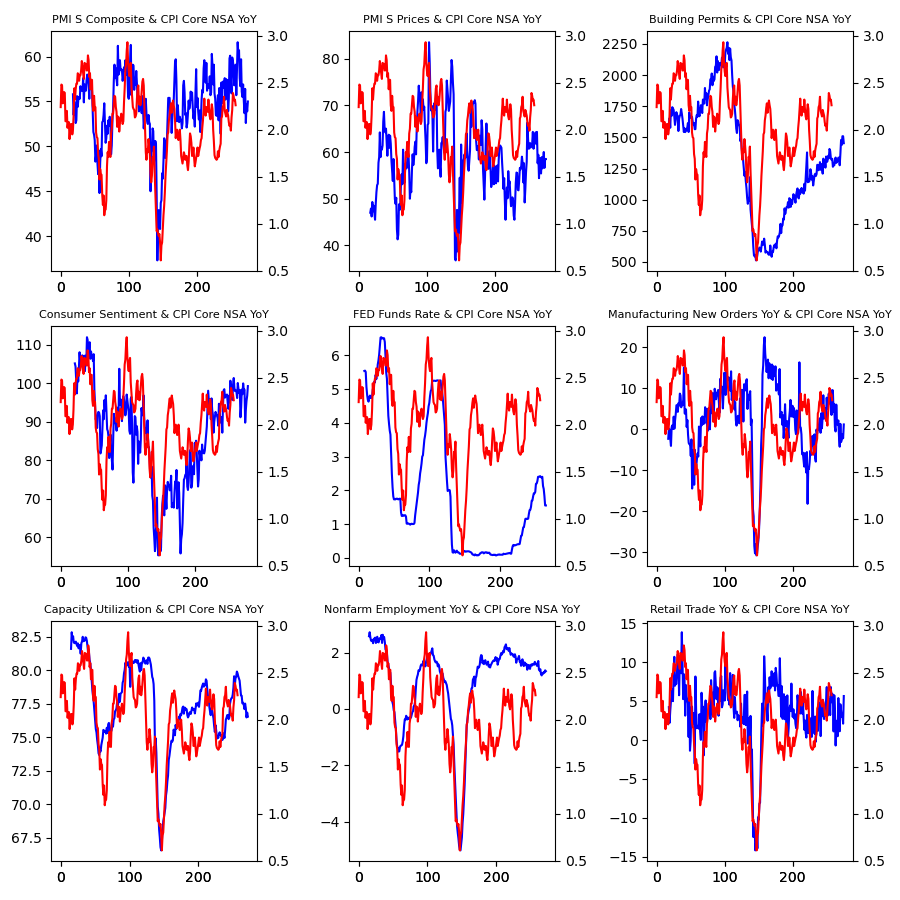

In [17]:
# correlation visualization

import matplotlib.pyplot as plt
%matplotlib notebook

fig = plt.figure(figsize=(9,9))

x_values = data_final.columns[1:10]
y_value = data_final.columns[-1]

row = range(3)
column = range(3)
x_values_count = 0
subplot_index = 1

for r in row:
    for c in column:
        ax1 = fig.add_subplot(3,3,subplot_index)
        line1 = ax1.plot(data_final.index,data_final[x_values[x_values_count]], 'b-')
        ax1.yaxis.tick_left()
        plt.title(str(x_values[x_values_count])+' & '+str(y_value),fontdict={'fontsize':8})
        
        ax2 = fig.add_subplot(3,3,subplot_index, sharex=ax1, frameon=False)
        line2 = ax2.plot(data_final.index,data_final[y_value], 'r-')
        ax2.yaxis.tick_right()
        
        x_values_count += 1
        subplot_index += 1

plt.tight_layout()

In [95]:
data_ml = data_final.dropna()

# dropping columns with high multi-colinearity tests performed bellow
data_ml = data_ml.drop(columns=['Capacity Utilization','PMI S Composite',
                                'Consumer Sentiment','Building Permits',
                               'Retail Trade YoY'])
data_ml

,Covering Date,PMI S Prices,FED Funds Rate,Manufacturing New Orders YoY,Nonfarm Employment YoY,CPI Core NSA YoY
21,04-2000,47.3,5.07,-4.05,2.33,2.32
22,05-2000,48.5,5.22,0.53,2.49,2.43
23,06-2000,47.0,5.20,0.97,2.47,2.49
24,07-2000,45.5,5.42,0.07,2.53,2.49
25,08-2000,48.9,5.30,3.08,2.34,2.60
...,...,...,...,...,...,...
253,08-2019,61.5,2.27,6.24,1.59,2.39
254,09-2019,61.8,2.40,8.39,1.60,2.36
255,10-2019,64.3,2.40,9.32,1.57,2.31
256,11-2019,60.7,2.41,3.50,1.67,2.32


In [96]:
# multi-collinearity tests

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings

def correlation_matrix():
    corr = data_ml[data_ml.columns[1:(len(data_ml.columns)-1)]].corr()
    return corr.style.background_gradient(cmap='coolwarm')

def vif_with_constant():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    vif_data = data_ml[data_ml.columns[1:(len(data_ml.columns)-1)]]
    X = add_constant(vif_data)
    vif = pd.DataFrame([variance_inflation_factor(X.values,i)
              for i in range(X.shape[1])],
              index=X.columns)#[1:] to remove constant
    vif.rename(columns={0:'VIF'},inplace=True)
    return vif.style.background_gradient(cmap='coolwarm')

def vif_no_constant():
    X = data_ml[data_ml.columns[1:(len(data_ml.columns)-1)]]
    vif_data = pd.DataFrame()
    vif_data["X_variables"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
    return vif_data.style.background_gradient(cmap='coolwarm')

In [97]:
correlation_matrix()

,PMI S Prices,FED Funds Rate,Manufacturing New Orders YoY,Nonfarm Employment YoY
PMI S Prices,1.000000,0.256856,0.668921,0.285569
FED Funds Rate,0.256856,1.000000,0.244088,0.390478
Manufacturing New Orders YoY,0.668921,0.244088,1.000000,0.543332
Nonfarm Employment YoY,0.285569,0.390478,0.543332,1.000000


In [98]:
vif_with_constant()

,VIF
const,93.487078
PMI S Prices,1.899962
FED Funds Rate,1.221472
Manufacturing New Orders YoY,2.412866
Nonfarm Employment YoY,1.627725


In [99]:
vif_no_constant()

,X_variables,VIF
0,PMI S Prices,2.027507
1,FED Funds Rate,2.257043
2,Manufacturing New Orders YoY,1.536350
3,Nonfarm Employment YoY,1.979957


## add summary about all 4 variables how can they affect inflation

## -------------------------------------------------------------------------------

## Machine learning (Regression models)

In [100]:
#creating training and testing sets

from sklearn.model_selection import train_test_split

X = data_ml[['PMI S Prices',
             'FED Funds Rate',
             'Manufacturing New Orders YoY',
            'Nonfarm Employment YoY']]
y = data_ml['CPI Core NSA YoY']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2,train_size=0.8)

print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (189, 4)
y_train shape:  (189,)
X_test shape:  (48, 4)
y_test shape:  (48,)


In [101]:
# MODEL SELECTION

#linear regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train,y_train)

score_train = linreg.score(X_train, y_train)
score_test = linreg.score(X_test, y_test)

print('Linear Regression model train score is {:.2f} and test score is {:.2f}'.format(score_train,score_test))

#ridge regression








Linear Regression model train score is 0.73 and test score is 0.77
